# Ch10-3. 쌍체 표본 t검정 

특정 실험등의 효과가 유의한지 알아보기 위한 가설 검정 방법이다.  

일반적으로 특정 실험 전 후를 보았을 때 차이가 유의한지 보는 방법이다.  
실험 전과 후의 실험 데이터 개수가 같을 것이다. 각각 $d_n$이라고 한다.  
그 차이가 유의한지, 0인지 혹은 0이 아닌지 형태로 가설을 수립하고 검정하는 방법이다.  

## 쌍체 표본 t-검정의 선행 조건

- 실험 전과 후의 측정 값(즉, X와 Y)은 정규 분포를 따르지 않아도 무방함  
- 그러나 측정 값의 차이인 d는 정규성을 갖고 있어야 함  

## 쌍체 표본 t-검정의 통계량

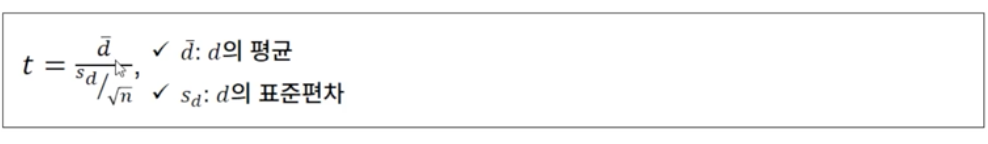
*(출처: 강의 10-3 쌍체 표본 t 검정)*

차이($d_n$)가 크면 클 수록 통계량도 커진다. 표준편차가 작을 수록 통계량도 커진다. 

## 파이썬을 이용한 쌍체 표본 t-검정

- 정규성 검정(KS test)  
```
scipy.stats.kstest(x, 'norm')
```
    pvalue가 특정 수치 미만이면 정규성을 따른다고 판단  
- 쌍체 표본 t 검정  
```
scipy.stats.ttest_rel(a, b)
# a, b: 실험 전 후 결과, 길이가 반드시 같아야 함
```
    pvalue가 특정 수치 미만이면 그룹a와 그룹b간의 차이가 존재한다고(유의미하다고) 판단. 즉, 특정 실험의 효과가 존재하는 것.  
    statistics가 양수면 양의 효과(d>0)가 있다고 판단, 음수면 음의 효과(d<0)가 있다고 판단.  


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/2. 탐색적 데이터 분석/데이터")

In [2]:
# 데이터 불러오기
df = pd.read_csv("다이어트약_효과검증.csv")

In [3]:
# 컬럼 구성
df.columns

Index(['다이어트전(kg)', '다이어트후(kg)'], dtype='object')

In [4]:
# 쌍체 검정 데이터 지정
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

In [5]:
# 정규성 검정 : 두 데이터 간의 차이가 정규성을 만족하는지 확인
from scipy.stats import *
kstest(after - before, 'norm')

KstestResult(statistic=0.7424620196514834, pvalue=7.04108433205159e-29)

pvalue가 0에 가깝다고요...? 네? 가까운거 맞아요?  

In [6]:
# 쌍체 표본 t검정
# 거의 0이므로 확실한 효과, 통계량이 양수이므로 양의 효과가 있음을 확인 (??????????)
ttest_rel(before, after) 

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)